<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_08_diferenciacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculo de derivadas


## Diferencias finitas de primer orden
El método de diferencias finitas aproxima derivadas numéricamente.


- Aproximación de primer orden hacia adelante:

\begin{equation}
      f'(x_k) \approx \frac{f(x_{k+1}) - f(x_k)}{h}
\end{equation}

- Aproximación de primer orden hacia atrás:

\begin{equation}
      f'(x_k) \approx \frac{f(x_k) - f(x_{k-1})}{h}
\end{equation}



\begin{equation}
\text{Error} = \frac{h}{2} f''(\xi)
\end{equation}

donde $x$ está entre $x_k$ y $x_{k+1}$.
## Diferencias finitas de segundo orden, diferencia central


Utilizando la fórmula de Taylor de segundo grado:
\begin{equation}
f(x) = f(x_k) + f'(x_k)(x - x_k) + \frac{f''(x_k)}{2}(x - x_k)^2 + R_2
\end{equation}

Evaluando en $x = x_{k+1} y x = x_{k-1}$:
\begin{equation}
f(x_{k+1}) = f(x_k) + f'(x_k)h + \frac{f''(x_k)}{2}h^2 + O(h^3)
\end{equation}

\begin{equation}
f(x_{k-1}) = f(x_k) - f'(x_k)h + \frac{f''(x_k)}{2}h^2 + O(h^3)
\end{equation}

Restando estas ecuaciones y despejando $f'(x_k)$:

\begin{equation}
f'(x_k) \approx \frac{f(x_{k+1}) - f(x_{k-1})}{2h}
\end{equation}




El error en la la aproximación de segundo orden es:
\begin{equation}
f'(x_k) \approx \frac{f(x_{k+1}) - f(x_{k-1})}{2h}
\end{equation}

El error de truncamiento es:
\begin{equation}
\text{Error} = \frac{h^2}{6} f'''(\xi)
\end{equation}

donde $\xi$ está entre $x_{k-1}$ y $x_{k+1}$.


# Actividad

1. Construya una función que permita calcular la derivada de una funcion empleando el metodo de diferencias centrales para aproximar el cálculo de la derivada con la función:

$y=e^{x^2}\sin x $

Compruebe  su solución empleando la derivada de sympy.

Analice que  pasa con la derivada cuando varia el valor de h.


2. Construya una función que permita calcular el método de diferencias centrales derivada para los siguientes puntos experimentales, emplee una pandas.

https://raw.githubusercontent.com/hernansalinas/autogradesMetodosComputacionales/main/Dataset/datos_pendulo.csv



In [2]:
import sympy as sp

def funcion(x):
    return sp.exp(x**2) * sp.sin(x)

def derivada_diferencias_centrales(x, h):
    return (funcion(x + h) - funcion(x - h)) / (2 * h)


x = sp.Symbol('x')
derivada_sympy = sp.diff(funcion(x), x)


h = 0.001
x_valor = 1
derivada_aprox = derivada_diferencias_centrales(x_valor, h)

print("Derivada calculada con diferencias centrales:", derivada_aprox)
print("Derivada calculada con sympy:", derivada_sympy.evalf(subs={x: x_valor}))

Derivada calculada con diferencias centrales: 6.04341401274100
Derivada calculada con sympy: 6.04340451427357


In [19]:
import pandas as pd


url = "https://raw.githubusercontent.com/hernansalinas/autogradesMetodosComputacionales/main/Dataset/datos_pendulo.csv"
datos = pd.read_csv(url)

def diferencias_centrales_derivada(datos):   #Aqui se usa la funcioón como en elprimer puntos pero con la lista de datos
    h = datos['Tiempo[ms]'].iloc[1] - datos['Tiempo[ms]'].iloc[0]
    derivada = (datos['AnguloRad'].shift(-1) - datos['AnguloRad'].shift(1)) / (2*h)
    return derivada


datos['derivada'] = diferencias_centrales_derivada(datos)


print(datos)

      Unnamed: 0  Tiempo[ms]  AnguloDeg  AnguloRad  derivada
0              0           9 -30.710388  -0.535997       NaN
1              1          42 -30.017673  -0.523907  0.000515
2              2          75 -28.762547  -0.502001  0.000928
3              3         108 -26.507523  -0.462644  0.001098
4              4         142 -24.611229  -0.429547  0.001301
...          ...         ...        ...        ...       ...
2842        2842       94709   4.937576   0.086177  0.000832
2843        2843       94743   6.479851   0.113095  0.000794
2844        2844       94776   7.940689   0.138591  0.000751
2845        2845       94809   9.318092   0.162631  0.000713
2846        2846       94843  10.637817   0.185665       NaN

[2847 rows x 5 columns]


3. El potencial eléctrico de un anillo de radio R, en la parte superior z del anillo viene dado por:


\begin{equation}
V = \frac{kq_{tot}z}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para z>0 y R=0.1mm. Reescale el problema en unidades de $kq_{top}$ empleando:

1. La librearia sympy.

2. Calcular el campo en el punto  $z = 0.1mm$ empleando el metodo np.grad

3. Calcular el campo para diferentes valores de z con z>0,,  empleando np.grad Construya un gráfico de E vs z.


Campo eléctrico en unidades de k*q_tot:
-1000000000000.0*z/(1.23799014723612e-12*z**2 + 1)**(3/2)

Campo eléctrico en el punto z = 0.1mm:
-0.0111265005605362


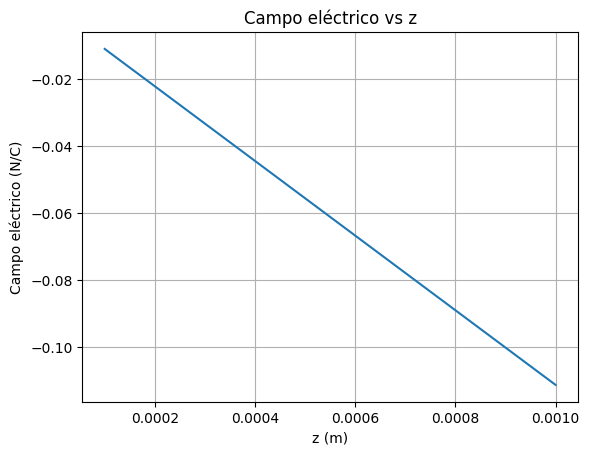

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

k = 8.9875517873681764e9
R = 0.1e-3
q_tot = 1
z = sp.symbols('z')
E = k * q_tot / sp.sqrt(z**2 + R**2)

E_grad = sp.diff(E, z)

E_grad_rescaled = E_grad.subs(z, z/(k*q_tot))

print("Campo eléctrico en unidades de k*q_tot:")
print(E_grad_rescaled)


E_point = sp.N(E_grad_rescaled.subs(z, 0.1e-3/(k*q_tot)))
print("\nCampo eléctrico en el punto z = 0.1mm:")
print(E_point)

z_values = np.linspace(0.1e-3, 1e-3, 100)
E_values = [sp.N(E_grad_rescaled.subs(z, z_val/(k*q_tot))) for z_val in z_values]

plt.figure()
plt.plot(z_values, E_values)
plt.xlabel('z (m)')
plt.ylabel('Campo eléctrico (N/C)')
plt.title('Campo eléctrico vs z')
plt.grid(True)
plt.show()